In [1]:
import numpy as np
from sklearn.cluster import k_means

def bkmeans(X:np.ndarray, k:int, i:int) -> np.ndarray:
    """Bisecting k-Means"""
    res = np.zeros(X.shape[0], dtype=int)
    for kk in range(1, k):
        values, counts = np.unique(res, return_counts=True)
        most_common_k = values[counts.argmax()]
        most_common_indices = res == most_common_k
        new_clusters = k_means(X[most_common_indices], 2, n_init=i)[1]
        res[most_common_indices] = np.where(new_clusters == 0, most_common_k, kk)
    return res

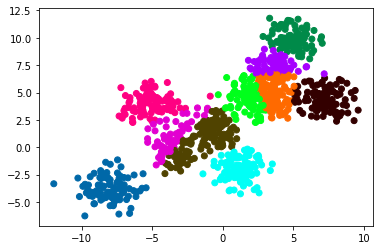

In [2]:
from colormap import generate_colormap
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=10, n_features=2)
k = 10
c = bkmeans(X, k, 100)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=generate_colormap(k))
plt.show()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

def sammons_stress(in_X, out_X):
    """Calculate Sammon's Stress"""
    S = np.triu(in_X)
    d = np.triu(out_X)
    return (1 / np.sum(S)) * np.sum(np.divide(np.square(d - S), S, out=np.zeros_like(S), where=S!=0))

def sammon(X, max_iter=100, epsilon=0.01, alpha=0.3, init="random", verbose=False):
    """Sammon Mapping"""
    S = pairwise_distances(X)
    S = np.where(S==0, 1e-100, S)
    c = np.sum(np.triu(S))
    y_indices = range(X.shape[0])

    if init == "pca":
        Y = PCA(n_components=2, random_state=1).fit_transform(X)
    else:
        Y = make_blobs(n_samples=X.shape[0], n_features=2, centers=1, random_state=1337)[0]

    for t in range(max_iter):
        d = pairwise_distances(Y)
        d = np.where(d==0, 1e-100, d)
        E = sammons_stress(S, d)
        if verbose:
            print(f"Iter: {t}, E = {E}")
        if E < epsilon:
            print(f"Error threshold of {epsilon}, reached at iter {t}. E = {E}")
            break

        for i in y_indices:
            first = np.array([0, 0], dtype=np.float64)
            second = np.array([0, 0], dtype=np.float64)
            for j in y_indices:
                if j == i: continue
                first += ((S[i,j] - d[i,j]) / (d[i,j] * S[i,j])) * (Y[i] - Y[j])
                second += (1 / (S[i,j] * d[i,j])) * ( (S[i,j] - d[i,j]) - ((np.square(Y[i] - Y[j]) / d[i,j]) * (1 + ( (S[i,j] - d[i,j]) / d[i,j] ))) )
            
            Y[i] = Y[i] - alpha * ((-2/c)*first)/np.abs((-2/c)*second)
    return Y

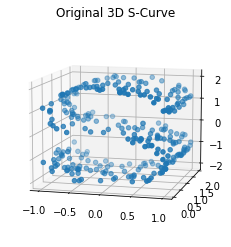

Iter: 0, E = 0.6390167608805878
Iter: 1, E = 0.5175148005749113
Iter: 2, E = 0.40612169133714593
Iter: 3, E = 0.3984854560220881
Iter: 4, E = 0.8242515864190099
Iter: 5, E = 0.815392495840205
Iter: 6, E = 0.3934202564914064
Iter: 7, E = 0.6581460336508639
Iter: 8, E = 2.2875512414144494
Iter: 9, E = 37.61581145892169
Iter: 10, E = 0.13924886420471572
Iter: 11, E = 0.2836469047713173
Iter: 12, E = 0.06175176264341181
Iter: 13, E = 0.03711349529307709
Iter: 14, E = 0.12943485602174357
Iter: 15, E = 0.03167975170605403
Iter: 16, E = 0.027404909329568267
Iter: 17, E = 0.030302637600516692
Iter: 18, E = 0.024473008415141703
Iter: 19, E = 0.023656812164454005
Iter: 20, E = 0.024411275157692276
Iter: 21, E = 0.023264267138415878
Iter: 22, E = 0.022975026269898155
Error threshold of 0.023, reached at iter 22. E = 0.022975026269898155


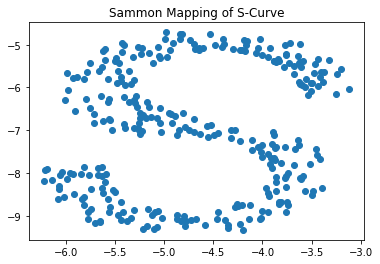

In [21]:
from sklearn.datasets import make_s_curve

X, y = make_s_curve(300, random_state=1)

fig = plt.figure("Original 3D S-Curve")
ax = fig.add_subplot(projection="3d")
ax.title.set_text("Original 3D S-Curve")
ax.view_init(10, 285)
ax.scatter(X[:,0], X[:,1], X[:,2])
plt.show()

Y = sammon(X, max_iter=50, epsilon=0.023, alpha=1, verbose=True)
plt.figure("Sammon Mapping of S-Curve")
plt.title("Sammon Mapping of S-Curve")
plt.scatter(Y[:,0], Y[:,1])

plt.show()

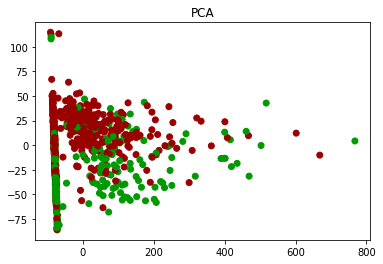

C:\Users\olofe\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\olofe\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


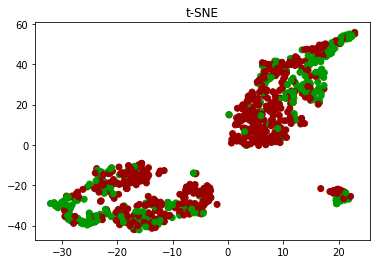

Iter: 0, E = 0.9742497095910126
Iter: 1, E = 0.9809712439833362
Iter: 2, E = 0.9640760796364107
Iter: 3, E = 0.9408290168379684
Iter: 4, E = 0.8908097829429776
Iter: 5, E = 0.8915340616264941
Iter: 6, E = 0.8441133144364731
Iter: 7, E = 0.8925325697894003
Iter: 8, E = 1.0070488006965137
Iter: 9, E = 1.033917388144414
Iter: 10, E = 0.8507241006388221
Iter: 11, E = 0.7845486250524156
Iter: 12, E = 0.7403802907443595
Iter: 13, E = 0.9688073155363957
Iter: 14, E = 1.0526444089248475
Iter: 15, E = 1.6840507230875676
Iter: 16, E = 1.6964137850920264
Iter: 17, E = 1.1454257730604964
Iter: 18, E = 2.7279059915961703
Iter: 19, E = 1.5748128576543485
Iter: 20, E = 208.31300939574936
Iter: 21, E = 102.20878961658865
Iter: 22, E = 50.9405388135943
Iter: 23, E = 25.238021534902703
Iter: 24, E = 12.504961402719028
Iter: 25, E = 6.245879311792974
Iter: 26, E = 3.417103175531408
Iter: 27, E = 1.8033543512980064
Iter: 28, E = 1.137881110214049
Iter: 29, E = 0.7504658600384748
Iter: 30, E = 0.5091390128

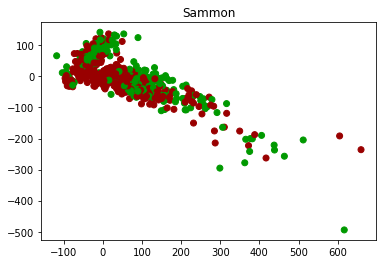

In [34]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from scipy.io import arff

data = np.array(arff.loadarff("data/diabetes.arff")[0].tolist())
X, y = np.array(data[:, :-1], dtype=np.float64), np.array(data[:, -1], dtype=str)
y = np.where(y=="tested_positive", 1, 0)

Y_p = PCA(n_components=2).fit_transform(X)
plt.figure()
plt.title("PCA")
plt.scatter(Y_p[:,0], Y_p[:, 1], c=y, cmap=ListedColormap(["#990000", "#009900"]), marker=".")
plt.show()

Y_t = TSNE(n_components=2).fit_transform(X)
plt.figure()
plt.title("t-SNE")
plt.scatter(Y_t[:,0], Y_t[:, 1], c=y, cmap=ListedColormap(["#990000", "#009900"]), marker=".")
plt.show()

Y = sammon(X, max_iter=50, epsilon=0.01, alpha=0.3, verbose=True)
plt.figure()
plt.title("Sammon")
plt.scatter(Y[:,0], Y[:,1], c=y, cmap=ListedColormap(["#990000", "#009900"]), marker=".")
plt.show()